## Exploratory Analysis on Fifa 20!

**This notebook is dedicated to explore the players dataset of Fifa 20 to find the best options to create a team!**

In [1]:
# Importing the lybraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [20]:
# First, let's import the data

df = pd.read_csv('players_20.csv')

In [110]:
# We can have a look of the first rows in the dataset using .head() function

df.head()

,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,...,75,96,33,37,26,6,11,15,14,8
1,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,...,85,95,28,32,24,7,11,15,14,11
2,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,...,90,94,27,26,29,9,9,15,15,11
3,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,...,11,68,27,12,18,87,92,78,90,89
4,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,...,88,91,34,27,22,11,12,6,8,8


In [21]:
# To see some important informations use:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(45), object(43)
memory usage: 14.5+ MB


In [22]:
# How much rows and columns we have? Using info() we can see that we got 18278 rows with 104 features
# More easy to find this info, you can type:

df.shape # Returns a tuple with the number of rows and the number of columns (features)

(18278, 104)

In [23]:
#Let's use as index the id of the players
df.set_index('sofifa_id', inplace = False) # Without use the inplace = True, the change will not save on your dataset variable 
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [24]:
#Let's see the name of columns - we have 103 names here, let's split into 4 prints
columns = df.columns

print(columns[:25], '\n')
print(columns[26:50], '\n')
print(columns[51:75],'\n')
print(columns[76:])

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club', 'overall', 'potential',
       'value_eur', 'wage_eur', 'player_positions', 'preferred_foot',
       'international_reputation', 'weak_foot', 'skill_moves', 'work_rate',
       'body_type', 'real_face', 'release_clause_eur', 'player_tags',
       'team_position'],
      dtype='object') 

Index(['loaned_from', 'joined', 'contract_valid_until', 'nation_position',
       'nation_jersey_number', 'pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking',
       'gk_reflexes', 'gk_speed', 'gk_positioning', 'player_traits',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling'],
      dtype='object') 

Index(['skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration

## For this study, We will delete some columns

In [25]:
cols_to_drop = ['sofifa_id','body_type', 'real_face','player_tags','team_jersey_number', 'nation_position','nation_jersey_number','ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw',
       'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm',
       'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb']
df.drop(cols_to_drop, axis = 1, inplace = True)

In [26]:
df.head()

,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,...,75,96,33,37,26,6,11,15,14,8
1,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,...,85,95,28,32,24,7,11,15,14,11
2,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,...,90,94,27,26,29,9,9,15,15,11
3,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,...,11,68,27,12,18,87,92,78,90,89
4,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,...,88,91,34,27,22,11,12,6,8,8


## Let's have a look of the potential and the overall by the age of the players

**To analyse this we can use a histogram**

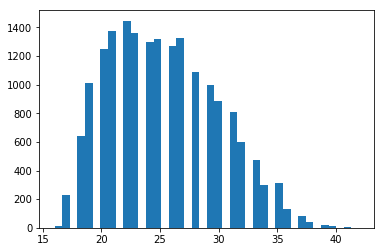

In [33]:
df['age'].hist(bins = 40,grid = False)

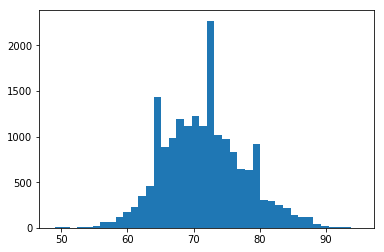

In [34]:
df['potential'].hist(bins = 40,grid = False)

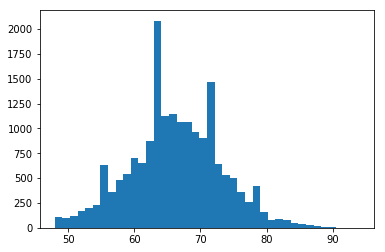

In [35]:
df['overall'].hist(bins = 40,grid = False)

In [39]:
#Let's get a resume of statistical basic analysis of one part of our data

cols_desc = ['age','height_cm','weight_kg','overall', 'potential', 'value_eur','wage_eur','release_clause_eur']

df[cols_desc].describe()

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,release_clause_eur
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,1.827800e+04,18278.000000,1.698000e+04
mean,25.283291,181.362184,75.276343,66.244994,71.546887,2.484038e+06,9456.942773,4.740717e+06
std,4.656964,6.756961,7.047744,6.949953,6.139669,5.585481e+06,21351.714095,1.103002e+07
min,16.000000,156.000000,50.000000,48.000000,49.000000,0.000000e+00,0.000000,1.300000e+04
25%,22.000000,177.000000,70.000000,62.000000,67.000000,3.250000e+05,1000.000000,5.630000e+05
50%,25.000000,181.000000,75.000000,66.000000,71.000000,7.000000e+05,3000.000000,1.200000e+06
75%,29.000000,186.000000,80.000000,71.000000,75.000000,2.100000e+06,8000.000000,3.700000e+06
max,42.000000,205.000000,110.000000,94.000000,95.000000,1.055000e+08,565000.000000,1.958000e+08


In [40]:
# To get specific information you can use the statistical functions directly

print('The mean overall for the players is about {} points'.format(round(df.overall.mean(),2)))
#Using round to only show 2 numbers after the dot -> rount(column.mean(),how_numbers_after_dot)

print('The mean potential for the players is about {} points'.format(round(df.potential.mean(),2)))

print('The mean age for the players is about {} years'.format(round(df.age.mean(),2)))

The mean overall for the players is about 66.24 points
The mean potential for the players is about 71.55 points
The mean age for the players is about 25.28 years


In [41]:
# Ok, we got the mean, but the variation? let's analyse the standard deviation

overstd, potstd, agestd = df.overall.std(),df.potential.std(),df.age.std()

print('Overall std is:',round(overstd,2))
print('Potential std is:', round(potstd,2))
print('Age std is:', round(agestd,2))


Overall std is: 6.95
Potential std is: 6.14
Age std is: 4.66


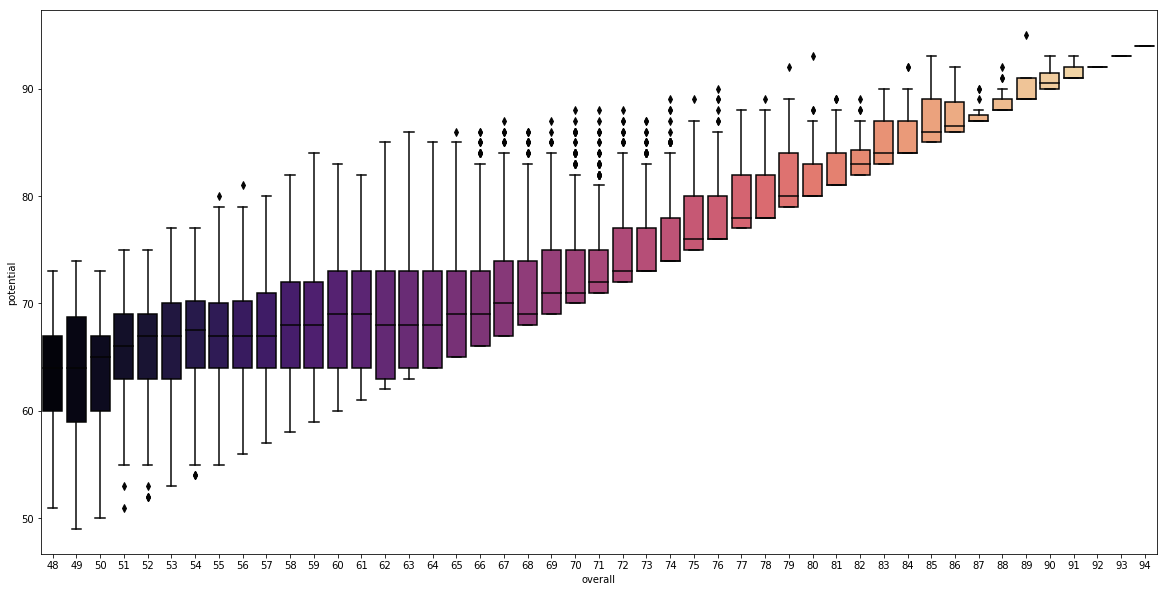

In [42]:
# We can use plots to see the variation of the overall with the potential


plt.figure(figsize = (20,10))
sns.boxplot(x = 'overall', y = 'potential', data = df, palette = 'magma')

In [134]:
# With a big dataset, sometimes is difficult to analyse every feature, let's create a small dataset with some features

data = df[['short_name', 'club','age','overall','potential','nationality','value_eur','height_cm','weight_kg',
           'wage_eur', 'player_positions', 'preferred_foot','international_reputation',
           'skill_moves', 'work_rate','release_clause_eur','team_position']]
data.head()

,short_name,club,age,overall,potential,nationality,value_eur,height_cm,weight_kg,wage_eur,player_positions,preferred_foot,international_reputation,skill_moves,work_rate,release_clause_eur,team_position
0,L. Messi,FC Barcelona,32,94,94,Argentina,95500000,170,72,565000,"RW, CF, ST",Left,5,4,Medium/Low,195800000.0,RW
1,Cristiano Ronaldo,Juventus,34,93,93,Portugal,58500000,187,83,405000,"ST, LW",Right,5,5,High/Low,96500000.0,LW
2,Neymar Jr,Paris Saint-Germain,27,92,92,Brazil,105500000,175,68,290000,"LW, CAM",Right,5,5,High/Medium,195200000.0,CAM
3,J. Oblak,Atlético Madrid,26,91,93,Slovenia,77500000,188,87,125000,GK,Right,3,1,Medium/Medium,164700000.0,GK
4,E. Hazard,Real Madrid,28,91,91,Belgium,90000000,175,74,470000,"LW, CF",Right,4,4,High/Medium,184500000.0,LW


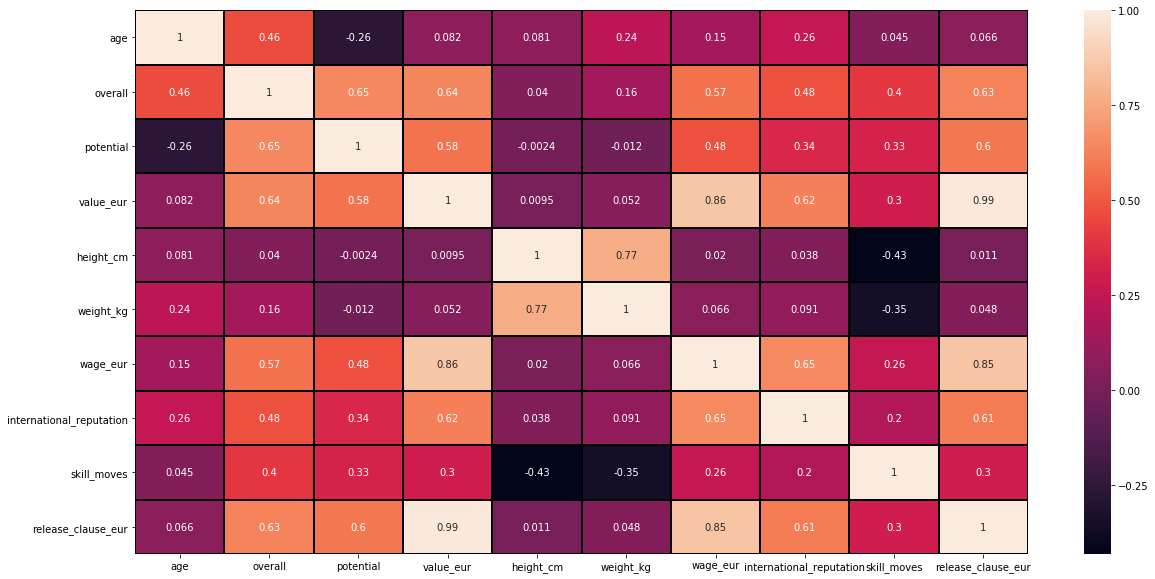

In [135]:
# Searching for the correlations between the features

plt.figure(figsize = (20,10))
sns.heatmap(data.corr(), annot = True, linecolor='black', linewidths = 1)

In [137]:
data.value_eur = data['value_eur']/1000000 # base in millions 
data.wage_eur = data.wage_eur/1000 # base in thousands
data.release_clause_eur = data.release_clause_eur/1000000 # Base in millions
data.head()

,short_name,club,age,overall,potential,nationality,value_eur,height_cm,weight_kg,wage_eur,player_positions,preferred_foot,international_reputation,skill_moves,work_rate,release_clause_eur,team_position
0,L. Messi,FC Barcelona,32,94,94,Argentina,95.5,170,72,565.0,"RW, CF, ST",Left,5,4,Medium/Low,195.8,RW
1,Cristiano Ronaldo,Juventus,34,93,93,Portugal,58.5,187,83,405.0,"ST, LW",Right,5,5,High/Low,96.5,LW
2,Neymar Jr,Paris Saint-Germain,27,92,92,Brazil,105.5,175,68,290.0,"LW, CAM",Right,5,5,High/Medium,195.2,CAM
3,J. Oblak,Atlético Madrid,26,91,93,Slovenia,77.5,188,87,125.0,GK,Right,3,1,Medium/Medium,164.7,GK
4,E. Hazard,Real Madrid,28,91,91,Belgium,90.0,175,74,470.0,"LW, CF",Right,4,4,High/Medium,184.5,LW


In [138]:
# Let's rename the columns to do not forget the scale of values
data.rename(columns = {'value_eur': 'value_eur_MM', 'wage_eur':'wage_eur_k', 'release_clause_eur':'release_clause_eur_MM'})

,short_name,club,age,overall,potential,nationality,value_eur_MM,height_cm,weight_kg,wage_eur_k,player_positions,preferred_foot,international_reputation,skill_moves,work_rate,release_clause_eur_MM,team_position
0,L. Messi,FC Barcelona,32,94,94,Argentina,95.50,170,72,565.0,"RW, CF, ST",Left,5,4,Medium/Low,195.800,RW
1,Cristiano Ronaldo,Juventus,34,93,93,Portugal,58.50,187,83,405.0,"ST, LW",Right,5,5,High/Low,96.500,LW
2,Neymar Jr,Paris Saint-Germain,27,92,92,Brazil,105.50,175,68,290.0,"LW, CAM",Right,5,5,High/Medium,195.200,CAM
3,J. Oblak,Atlético Madrid,26,91,93,Slovenia,77.50,188,87,125.0,GK,Right,3,1,Medium/Medium,164.700,GK
4,E. Hazard,Real Madrid,28,91,91,Belgium,90.00,175,74,470.0,"LW, CF",Right,4,4,High/Medium,184.500,LW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,Shao Shuai,Beijing Renhe FC,22,48,56,China PR,0.04,186,79,2.0,CB,Right,1,2,Medium/High,0.070,RES
18274,Xiao Mingjie,Shanghai SIPG FC,22,48,56,China PR,0.04,177,66,2.0,CB,Right,1,2,Medium/Medium,0.072,SUB
18275,Zhang Wei,Hebei China Fortune FC,19,48,56,China PR,0.04,186,75,1.0,CM,Right,1,2,Low/Medium,0.070,SUB
18276,Wang Haijian,Shanghai Greenland Shenhua FC,18,48,54,China PR,0.04,185,74,1.0,CM,Right,1,2,Low/Low,0.070,SUB


In [139]:
# Let's get the number of null/missing values on our dataset

data.isnull().sum()

short_name                     0
club                           0
age                            0
overall                        0
potential                      0
nationality                    0
value_eur                      0
height_cm                      0
weight_kg                      0
wage_eur                       0
player_positions               0
preferred_foot                 0
international_reputation       0
skill_moves                    0
work_rate                      0
release_clause_eur          1298
team_position                240
dtype: int64

In [140]:
# The release clause has 1298 missing/null values. This could happen because some players doesn't have a release clause
# Let's change this missing release clause by zero

data.release_clause_eur.fillna(0, inplace = True)


In [141]:
data.release_clause_eur.isnull().sum()

0

In [142]:
# Some players position are missing! Let's put a tag "Not Specified"
# In this case, a good mananger will be able to set a position according the player skills

data.team_position.fillna('Not Specified', inplace = True)

In [143]:
data.team_position.isnull().sum()

0

# Creating a function to work as Scout

**Let's create a function that returns the best options for our search!**
**This search will be defined by four parameters: Release Clause, Age, Overall and Potential**

In [150]:
# This function will return the result search from our dataset

def scout(value_release = data.release_clause_eur.max(), age = data.age.max(), overall = data.overall.max(),
          potential = data.potential.max(), position = data.team_position):
    best_options = data.loc[(data.release_clause_eur <= value_release) & (data.age <= age) & 
                            (data.overall >= overall) & (data.potential >= potential)]
    return best_options.head(15).sort_values(by = 'overall', ascending = True)

In [151]:
# This function just ask for the search values and pass to the scout function

def best_options():
    release_clause = float(input('Release Clause (MM Eur): '))
    age = int(input('Player age max: '))
    overall = int(input('Player overall: '))
    potential = int(input('Player potential: '))
    
    return scout(release_clause, age, overall, potential)

## Let's try some seach

We want to find a player with **25 years old (max)**,
with minimum **overall of 80 points and potential abouve 90 points**
but with a **release clause less than Eur 96MM** 

In [152]:
# We can call the function and it will ask for the parameters
# After get the numbers, the scout function will search and return the values from our dataset

best_options()

Release Clause (MM Eur): 90
Player age max: 25
Player overall: 80
Player potential: 90


,short_name,club,age,overall,potential,nationality,value_eur,height_cm,weight_kg,wage_eur,player_positions,preferred_foot,international_reputation,skill_moves,work_rate,release_clause_eur,team_position
411,João Félix,Atlético Madrid,19,80,93,Portugal,28.0,181,70,38.0,"CF, ST",Right,1,5,High/Medium,74.9,RS
157,Fabián,Napoli,23,83,90,Spain,36.0,189,70,76.0,"CM, CDM, CAM",Left,1,4,Medium/Medium,68.4,LCM
108,J. Sancho,Borussia Dortmund,19,84,92,England,44.5,180,76,61.0,"RM, LM",Right,2,5,Medium/Low,82.3,RM
109,K. Havertz,Bayer 04 Leverkusen,20,84,92,Germany,46.0,188,83,70.0,"CAM, RM",Left,1,4,Medium/Medium,87.4,RF
74,G. Donnarumma,Milan,20,85,92,Italy,41.5,196,90,34.0,GK,Right,3,1,Medium/Medium,78.9,GK
77,N. Süle,FC Bayern München,23,85,90,Germany,46.5,195,97,115.0,CB,Right,2,2,Medium/Medium,80.2,RCB
78,S. Milinković-Savić,Lazio,24,85,90,Serbia,50.5,191,76,73.0,"CM, CAM",Right,2,4,High/Medium,89.6,RDM


## Using our function We found 7 players that matches our parameters!

**Using this simple fuction, we can search for players without using a Fifa20 scout!**

## Future steps:

    Increase and improve the search for positions, reputation and nationality
    Create a function that returns the picture of each player